<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/04-Probability-Distributions-Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Probability Distributions
Probability distributions describe the likelihood of different outcomes for a random event.

Here are a few ways to think about it:
* It's a comprehensive description of the possible values a random variable can take and the probabilities associated with each of these values.
* It can be viewed as a complete list of all potential outcomes, along with their respective probabilities.
* Probability distributions offer a visual representation of all possible events and the probability of each occurring.

## Probability Mass Function (PMF)
A Probability Mass Function (PMF) is a function that provides the probability that a discrete random variable is exactly equal to a specific value.

PMFs are useful when dealing with sample spaces composed of distinct, countable outcomes. For instance, a PMF can describe the probability of getting heads or tails in a coin flip, or the probability of rolling any specific face on a six-sided die.

Let's see some commonly used distributions that use PMFs:


## Bernoulli Distribution
The Bernoulli distribution is a discrete probability distribution that models a single trial of an experiment with precisely two possible outcomes: success or failure. It's  useful for situations where an event either happens or does not.

We can try understanding it using a coin flip:
* Let k = 1 for heads (success)
* k = 0 for tails (failure)

If p represents the probability of getting heads (success), then:
* The probability of getting heads: $P(k=1|p) = p$
* And the probability of getting tails: $P(k=0|p) = 1-p$

Combining these, the Probability Mass Function (PMF) for the Bernoulli distribution is given by:
$$P(k|p) = p^k *(1-p)^{1-k}$$
Where
* When k=1 (heads), the PMF simplifies to $p$
* When k=0 (tails), the PMF simplifies to $1-p$

This equation is also referred to as the **likelihood function**.

Note: A Bernoulli distribution is a special case of the binomial distribution where the number of trials n=1 (this will make sense in the next section)


## Binomial Distribution
Remember those questions we would get asked on what’s the probability of getting exactly 5 heads in 10 coin tosses etc? Well it’s time to solve them!

Enter Binomial Distributions!

The Binomial distribution is a discrete probability distribution that calculates the probability of obtaining a certain number of successful outcomes (k) in a fixed number of independent trials (n), given a constant probability of success (p) for each trial.

It displays all possible outcomes of k successes, within n trials with p probability.
*(If this sounds confusing, don’t fret the example below should clear it up)*

**“Bi”** in binomial refers to the two possible outcomes that we are concerned with: an event happening (success) or an event not happening (failure).

All binomial distributions contain three parameters:
* **k**: The number of outcomes we care about.
* **n**: The number of trials
* **p**: The probability of success on a single trial.

The Binomial Probability Mass Function (PMF) is given by:

$$B(k;n,p) =\binom{n}{k} *p^k *(1-p)^{n-k} $$
$$where \binom{n}{k} = \frac{n!}{k!  (n-k)!}$$

Let's break this equation down:
* $p^k$ represents the probability of observing k independent successes in one experiment.
* $(1-p)^{n-k}$	represents the probability of observing (n-k) failures together.
* $\binom{n}{k}$ (also written as nCk or (n choose k)) is the binomial coefficient. This term accounts for all possible combinations in which k successes can occur within n trials.

We typically describe a Binomial process using the notation:  
$Y \sim \text{Binomial}(n, p)$   
where $\sim$ stands for "is distributed as"

### Assumptions of the binomial distribution
1. The trials are independent
2. There are two possible outcomes (success and failure)
3. The probability of success is constant across trials

Using the above equation we can solve for any probabilities that have just 2 outcomes.  
For eg: ***what is the probability of getting 5 heads in 10 coin tosses?***  

$B(5;10,1/2) =\binom{10}{5} *(1/2)^5 *(1/2)^{10-5} $

### Plotting the Binomial Distribution
How does the above equation look in code?

The binom.pmf( ) function gives us the probability of seeing 5 heads in 10 coin tosses.

In [ ]:
from scipy.stats import binom
binom.pmf(5,10,1/2)

np.float64(0.24609375000000003)

### Wait, why is this not 50%?
This is a great question! Afterall, if the probability of heads is 50% and I toss a coin 10 times, then the probability of getting 5 heads should be 50% right?  
What you are thinking of is the expected value or the average result over many trials, but not the probability of a specific outcome.
* **Expected Value**
    * When you flip a coin 10 times, the expected number of heads is 5. This is because, on average, a fair coin will land on heads 50% of the time
    * However, the probability of getting exactly 5 heads in those 10 flips is different from the overall average.
* **Many Possible Outcomes**
    * When you toss a coin 10 times, there are 210 or 1024 possible sequences of heads and tails (e.g., HHHHHHHHHH, HHTHTTTHTH, etc.).
    * Only some of these sequences will have exactly 5 heads and 5 tails.
    * The calculation you saw before counts the number of ways to arrange 5 heads and 5 tails in a sequence of 10 flips.  

When you put this together you get 24.6%


### Plotting the Binomial Distribution
Remember at the start of this chapter I had said, probability distributions offer a visual representation of all possible events and the probability of each occurring.

So how would we visualize this?

Well the above equation now allows us to calculate the probability for any k successes using a fixed n and p.


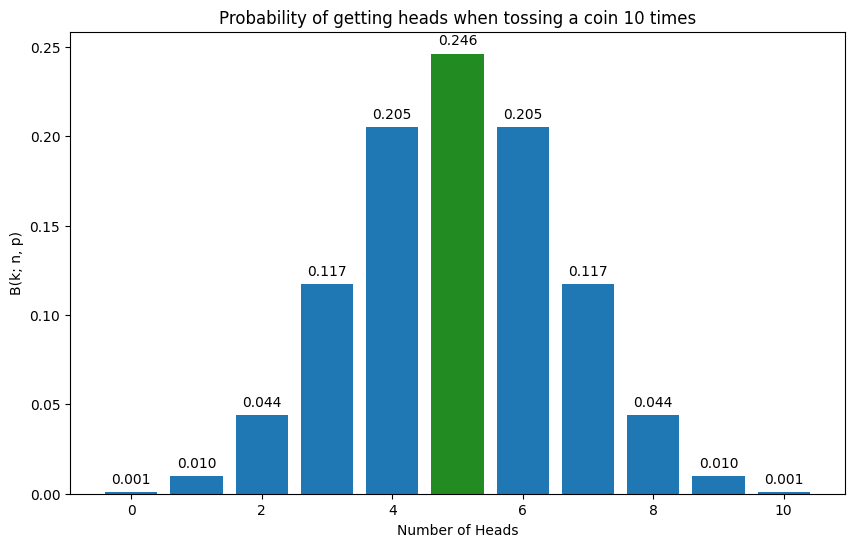

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials (coin tosses)
p = 0.5  # Probability of success (getting heads)


# Generate the x-axis values (number of heads)
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of heads
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Create a list of colors, highlighting the bar at x=5
colors = ['tab:blue'] * len(x)
colors[5] = 'forestgreen' # Set the color for x=5 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Number of Heads")
plt.ylabel("B(k; n, p)")
plt.title("Probability of getting heads when tossing a coin 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar

# Display the plot
plt.show()

The above chart shows all possible events and the probability of each occurring when flipping a coin 10 times.


Okay let’s look at another example using a fair sided die.  
***Q2) What is the probability of getting four 5s when rolling a die 10 times***


In [ ]:
from scipy.stats import binom
binom.pmf(4,10,1/6)

np.float64(0.054265875850988195)

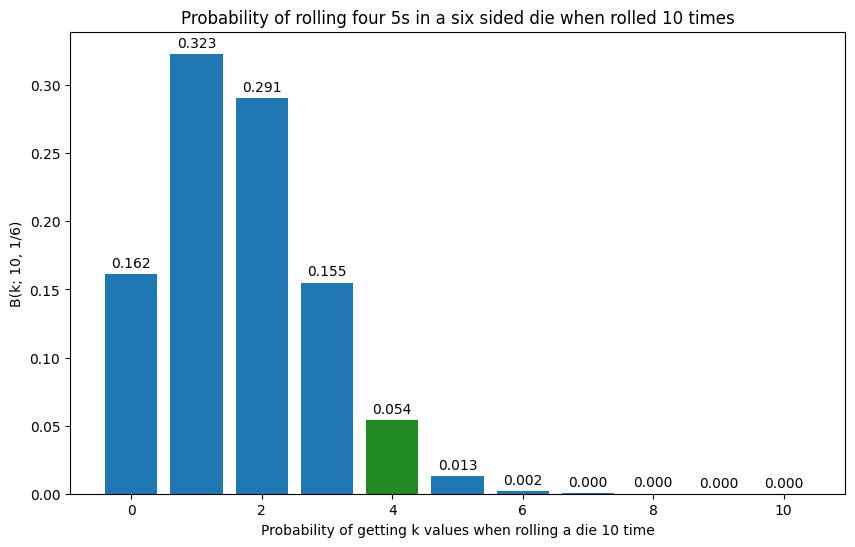

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials
p = 1/6  # Probability of success


# Generate the x-axis values
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of rolls
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list of colors, highlighting the bar at x=4
colors = ['tab:blue'] * len(x)
colors[4] = 'forestgreen' # Set the color for x=4 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Probability of getting k values when rolling a die 10 time")
plt.ylabel("B(k; 10, 1/6)")
plt.title("Probability of rolling four 5s in a six sided die when rolled 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar
# Display the plot
plt.show()

If you are also asked the probability of getting **at least** four 5s when rolling a six sided die 10 times, you just have to add the bars of 4,5,6.


What would that look like?


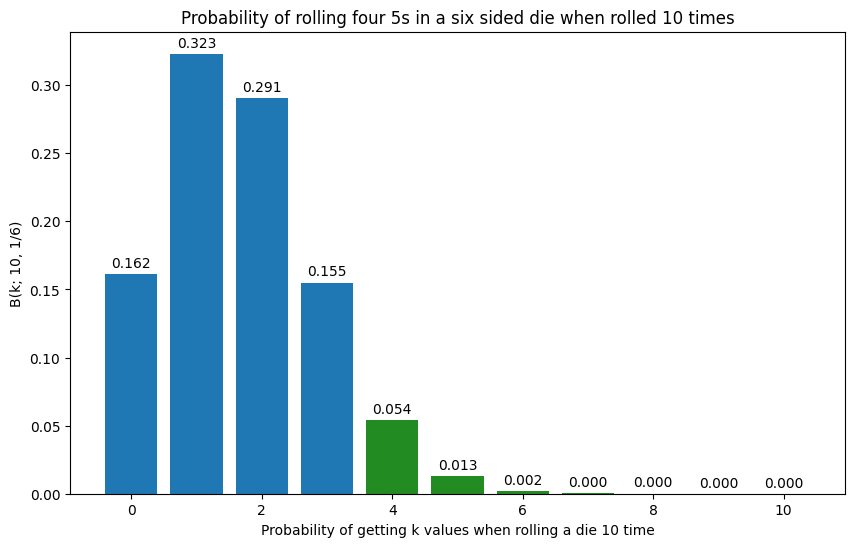

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials
p = 1/6  # Probability of success


# Generate the x-axis values
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of rolls
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list of colors, highlighting the bar at x=4
colors = ['tab:blue'] * len(x)
colors[4] = 'forestgreen' # Set the color for x=4 to green
colors[5] = 'forestgreen' # Set the color for x=5 to green
colors[6] = 'forestgreen' # Set the color for x=6 to green
colors[7] = 'forestgreen' # Set the color for x=7 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Probability of getting k values when rolling a die 10 time")
plt.ylabel("B(k; 10, 1/6)")
plt.title("Probability of rolling four 5s in a six sided die when rolled 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar
# Display the plot
plt.show()

In [ ]:
from scipy.stats import binom
n = 10
p = 1/6
# Calculate the probability using the survival function (1 - cdf)
result = 1 - binom.cdf(3, n, p)
result


np.float64(0.0697278425544886)

Translation: There’s a 7% chance that you will see that specific number show up 4 or more times in 10 throws.

Now you may be wondering, oh coin flips and rolling a die are fine, but…


### How is this relevant to me?
Let’s look at few other examples that might be helpful


**Example 1: e-commerce business**  
An e-commerce website has a 2% conversion rate. If they have 500 visitors in a day, what is the probability that exactly 10 visitors make a purchase?


In [ ]:
from scipy.stats import binom
n = 500  # Total number of visitors (trials)
p = 0.02  # Probability of a single visitor making a purchase (conversion rate)
k = 10   # Number of purchases we are interested in (number of successes)
# We want the probability of getting exactly 10 purchases, which is P(X = 10).
result_ecommerce = binom.pmf(k, n, p)
print(f"Example 1 (E-commerce): The probability of exactly {k} purchases out of {n} visitors with a conversion rate of {p*100}% is: {result_ecommerce}")

Example 1 (E-commerce): The probability of exactly 10 purchases out of 500 visitors with a conversion rate of 2.0% is: 0.12637979106893046


**Example 2: Stock market**   
You pick 20 stocks, and there is a 5% chance that any single stock will be a "10x bagger".
What is the probability of picking exactly 3 "10x baggers" out of the 20 stocks?



In [ ]:
from scipy.stats import binom
n = 20  # Number of stocks picked (trials)
p = 0.05  # Probability of a single stock being a "10x bagger" (probability of success)
k = 3   # Number of "10x baggers" we are interested in (number of successes)
# We want the probability of getting exactly 3 "10x baggers", which is P(X = 3).
result_stocks = binom.pmf(k, n, p)
print(f"Example 2 (Stock Market): The probability of picking exactly {k} '10x baggers' out of {n} stocks with a {p*100}% chance for each is: {result_stocks}")


Example 2 (Stock Market): The probability of picking exactly 3 '10x baggers' out of 20 stocks with a 5.0% chance for each is: 0.05958214776873281


**Example 3: Exam**  
You are taking a multiple-choice test with 15 questions, and each question has 4 possible answers. You didn't study and decided to guess randomly on every question. What is the probability that you get at least 8 questions correct?


In [ ]:
# Parameters for the binomial distribution
n = 15  # Number of trials (questions)
p = 1/4  # Probability of success (guessing correctly)
# We want the probability of getting at least 8 questions correct, which is P(X >= 8).
# This is equal to 1 - P(X <= 7).
probability_scenario1 = 1 - binom.cdf(7, n, p)
print(f"The probability of getting at least 8 questions correct when guessing on 15 questions with 4 options each is: {probability_scenario1}")

The probability of getting at least 8 questions correct when guessing on 15 questions with 4 options each is: 0.017299838364124298


Q3.1) Suppose you quickly read through some of the material before the test, and your probability of answering each question correctly increases to 1/3. Does this increase make you twice as likely to get at least 8 questions correct compared to guessing randomly on all 15 questions?

In [ ]:
from scipy.stats import binom
# Parameters for the second scenario (improved guessing probability)
n_scenario2 = 15  # Number of questions (trials) remains the same
p_scenario2 = 1/3  # New probability of guessing a question correctly
# We want the probability of getting at least 8 questions correct, which is P(X >= 8).
# This is equal to 1 - P(X < 8) = 1 - P(X <= 7).
# So, we calculate the CDF at k=7 and subtract it from 1.
probability_scenario2 = 1 - binom.cdf(7, n_scenario2, p_scenario2)
print(f"The probability of getting at least 8 out of {n_scenario2} questions correct with a {round(p_scenario2*100, 2)}% chance per question is: {probability_scenario2}")
# Compare the probabilities
if probability_scenario2 >= 2 * probability_scenario1:
   print("\nYou are at least twice as likely to get at least 8 questions correct in the second scenario.")
else:
   print("\nYou are not twice as likely to get at least 8 questions correct in the second scenario.")

The probability of getting at least 8 out of 15 questions correct with a 33.33% chance per question is: 0.08823159840676364

You are at least twice as likely to get at least 8 questions correct in the second scenario.


Okay time to take a break! We’ll look at Beta distributions next!